In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [22]:
lstm_ann_output = pd.read_csv('sample_data/Prediction ratio_output.csv')

In [ ]:
ann_output = pd.read_csv('sample_data/ann_output.csv')
bidirec_gru_output = pd.read_csv('sample_data/bidirec_gru_output.csv')
bidirec_lstm_output = pd.read_csv('sample_data/bidirec_lstm_output.csv')
gru_output = pd.read_csv('sample_data/gru_output.csv')
lstm_output = pd.read_csv('sample_data/lstm_output.csv')
perceptron_output = pd.read_csv('sample_data/mlp_output.csv')
simplernn_output = pd.read_csv('sample_data/simplernn_output.csv')

In [ ]:
data = {
    'ANN_false': ann_output['ANN_false'].dropna(),
    'ANN_true': ann_output['ANN_true'].dropna(),
    'Bidirec_GRU_false': bidirec_gru_output['Bidirec_GRU_false'].dropna(),
    'Bidirec_GRU_true': bidirec_gru_output['Bidirec_GRU_true'].dropna(),
    'Bidirec_LSTM_false': bidirec_lstm_output['Bidirec_LSTM_false'].dropna(),
    'Bidirec_LSTM_true': bidirec_lstm_output['Bidirec_LSTM_true'].dropna(),
    'LSTM_false': lstm_output['LSTM_false'].dropna(),
    'LSTM_true': lstm_output['LSTM_true'].dropna(),
    'GRU_false': gru_output['GRU_false'].dropna(),
    'GRU_true': gru_output['GRU_true'].dropna(),
    'Perceptron_false': perceptron_output['MLP_false'].dropna(),
    'Perceptron_true': perceptron_output['MLP_true'].dropna(),
    'SimpleRnn_false': simplernn_output['SimpleRnn_false'].dropna(),
    'SimpleRnn_true': simplernn_output['SimpleRnn_true'].dropna()
  }

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,ANN_false,ANN_true,Bidirec_GRU_false,Bidirec_GRU_true,Bidirec_LSTM_false,Bidirec_LSTM_true,LSTM_false,LSTM_true,GRU_false,GRU_true,Perceptron_false,Perceptron_true,SimpleRnn_false,SimpleRnn_true
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.961538,0.142857,0.942308,0.142857,0.942308,0.178571,0.942308,0.107143,0.942308,0.0,0.961538,0.0,0.961538
2,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000


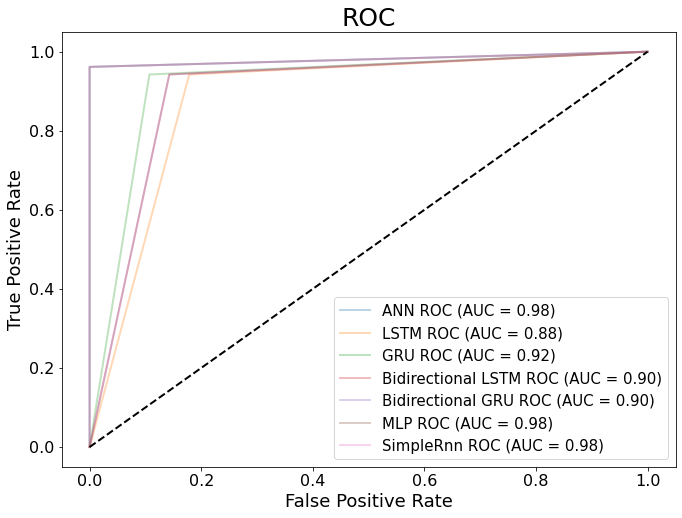

<Figure size 720x432 with 0 Axes>

In [ ]:
import matplotlib.patches as patches

# # plot arrows
# fig1 = plt.figure(figsize=[12,12])
# ax1 = fig1.add_subplot(111,aspect = 'equal')
# ax1.add_patch(
#     patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
#     )
# ax1.add_patch(
#     patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
#     )

fig = plt.gcf()
#plt.figure(figsize=(11,8))
fig.set_size_inches(11,8, forward=True)

ann_fpr, ann_tpr = df['ANN_false'], df['ANN_true']
ann_roc_auc = auc(ann_fpr, ann_tpr)

lstm_fpr, lstm_tpr = df['LSTM_false'], df['LSTM_true']
lstm_roc_auc = auc(lstm_fpr, lstm_tpr)

gru_fpr, gru_tpr = df['GRU_false'], df['GRU_true']
gru_roc_auc = auc(gru_fpr, gru_tpr)

bidirec_lstm_fpr, bidirec_lstm_tpr = df['Bidirec_LSTM_false'], df['Bidirec_LSTM_true']
bidirec_lstm_roc_auc = auc(bidirec_lstm_fpr, bidirec_lstm_tpr)

bidirec_gru_fpr, bidirec_gru_tpr = df['Bidirec_GRU_false'], df['Bidirec_GRU_true']
bidirec_gru_roc_auc = auc(bidirec_gru_fpr, bidirec_gru_tpr)

perceptron_fpr, perceptron_tpr = df['Perceptron_false'], df['Perceptron_true']
perceptron_roc_auc = auc(perceptron_fpr, perceptron_tpr)

simplernn_fpr, simplernn_tpr = df['SimpleRnn_false'], df['SimpleRnn_true']
simplernn_roc_auc = auc(simplernn_fpr, simplernn_tpr)

plt.plot(ann_fpr, ann_tpr, lw=2, alpha=0.3, label='ANN ROC (AUC = %0.2f)' % (ann_roc_auc))
plt.plot(lstm_fpr, lstm_tpr, lw=2, alpha=0.3, label='LSTM ROC (AUC = %0.2f)' % (lstm_roc_auc))
plt.plot(gru_fpr, gru_tpr, lw=2, alpha=0.3, label='GRU ROC (AUC = %0.2f)' % (gru_roc_auc))
plt.plot(bidirec_lstm_fpr, bidirec_lstm_tpr, lw=2, alpha=0.3, label='Bidirectional LSTM ROC (AUC = %0.2f)' % (bidirec_lstm_roc_auc))
plt.plot(bidirec_gru_fpr, bidirec_gru_tpr, lw=2, alpha=0.3, label='Bidirectional GRU ROC (AUC = %0.2f)' % (bidirec_gru_roc_auc))
plt.plot(perceptron_fpr, perceptron_tpr, lw=2, alpha=0.3, label='MLP ROC (AUC = %0.2f)' % (perceptron_roc_auc))
plt.plot(simplernn_fpr, simplernn_tpr, lw=2, alpha=0.3, label='SimpleRnn ROC (AUC = %0.2f)' % (simplernn_roc_auc))


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.xlabel('False Positive Rate', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('ROC',fontsize=25)
plt.legend(loc="lower right",fontsize=15)
# plt.text(0.32,0.7,'More accurate area',fontsize = 12)
# plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

plt.draw()
fig.savefig('roc.png', dpi=200)

In [ ]:
from google.colab import files
files.download('roc.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
dataset=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000]

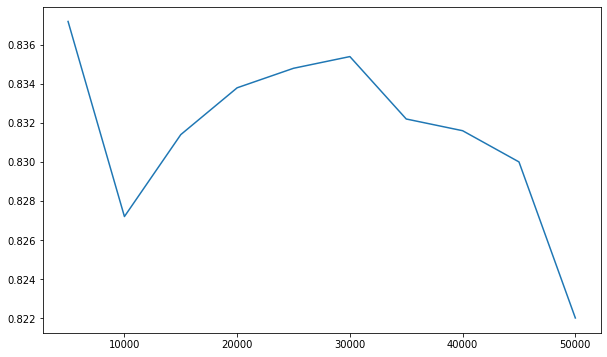

In [24]:
plt.rcParams["figure.figsize"] = [10,6]
plt.plot(dataset,lstm_ann_output['LSTM-ANN_prediction_accuracy'], label='LSTM-ANN')

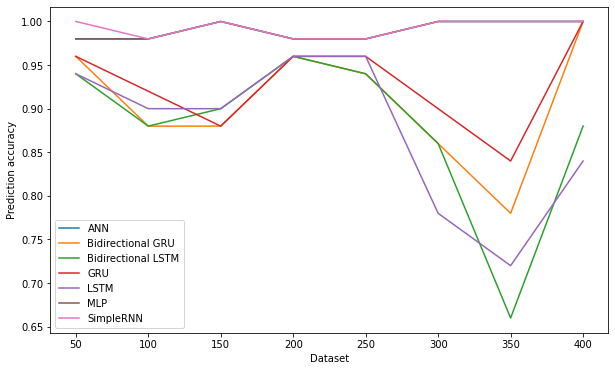

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
plt.plot(dataset,ann_output['ANN_prediction_accuracy'], label='ANN')
plt.plot(dataset,bidirec_gru_output['Bidirec_GRU_prediction_accuracy'], label='Bidirectional GRU')
plt.plot(dataset,bidirec_lstm_output['Bidirec_LSTM_prediction_accuracy'], label='Bidirectional LSTM')
plt.plot(dataset,gru_output['GRU_prediction_accuracy'], label='GRU')
plt.plot(dataset,lstm_output['LSTM_prediction_accuracy'], label='LSTM')
plt.plot(dataset,perceptron_output['MLP_prediction_accuracy'], label='MLP')
plt.plot(dataset,simplernn_output['SimpleRnn_prediction_accuracy'], label='SimpleRNN')
plt.ylabel('Prediction accuracy')
plt.xlabel('Dataset')
plt.savefig('Prediction ratio.png', dpi = 300)
plt.legend()
plt.show()

In [ ]:
Time=[27.814651012420654,45.9290030002594,75.80926322937012,71.39764761924744,87.09749364852905,31.308454275131226,40.48293113708496 ]

In [ ]:
Model=['ANN','LSTM','Bidirectional LSTM','GRU','Bidirectional GRU','MLP','SimpleRNN']

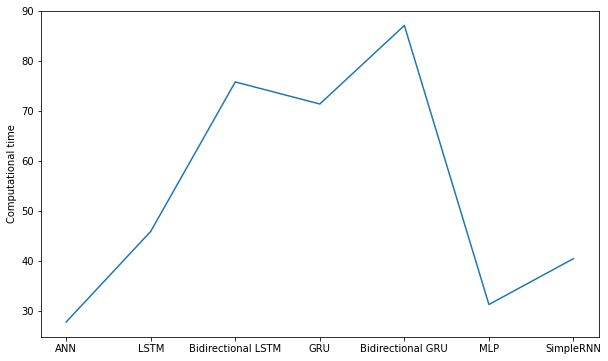

In [ ]:
#
#You can set the figure size if you explicitly create the figure with
#plt.figure(figsize=(3,4))
plt.rcParams["figure.figsize"] = [10,6]
plt.plot(Model,Time)
plt.ylabel("Computational time")
plt.savefig('comutationalTime.png', dpi = 300)